In [2]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def laplace_mech_vec(vec, sensitivity, epsilon):
    return [v + np.random.laplace(loc=0, scale=sensitivity / epsilon) for v in vec]

def gaussian_mech(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)

def gaussian_mech_vec(vec, sensitivity, epsilon, delta):
    return [v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)
            for v in vec]

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

data = pd.read_csv('https://github.com/TeemoXu/CS211_final/raw/main/bestsellers_with_categories.csv')

In [3]:
def range_query(df, col, a, b):
    return len(df[(df[col] >= a) & (df[col] < b)])

In [4]:
# for user rating column
random_lower_bounds_rating = [random.uniform(3, 4) for _ in range(100)]
random_workload_rating = [(lb, random.uniform(lb, 5)) for lb in random_lower_bounds_rating]
real_rates = [range_query(data, 'User Rating', lb, ub) for (lb, ub) in random_workload_rating]

# use of laplace mechnism 
def workload_laplace_vec(workload, epsilon):
    sensitivity = 1 * len(workload)
    answers = laplace_mech_vec([range_query(data, 'User Rating', lb, ub) for (lb, ub) in workload], sensitivity, epsilon)
    return answers

def workload_gaussian_vec(workload, epsilon, delta):
    sensitivity = np.sqrt(len(workload))
    answers = gaussian_mech_vec([range_query(data, 'User Rating', lb, ub) for (lb, ub) in workload], sensitivity, epsilon, delta)
    return answers

errors_lap = [abs(r_a - l_a) for (r_a, l_a) in zip(real_rates, workload_laplace_vec(random_workload_rating, 1.0))]
errors_gau = [abs(r_a - l_a) for (r_a, l_a) in zip(real_rates, workload_gaussian_vec(random_workload_rating, 1.0, 1e-5))]
print('Average absolute error for laplace mechnism:', np.mean(errors_lap))
print('Average absolute error for gaussion mechnism:', np.mean(errors_gau))

Average absolute error for laplace mechnism: 112.73681078424188
Average absolute error for gaussion mechnism: 38.22334856787324


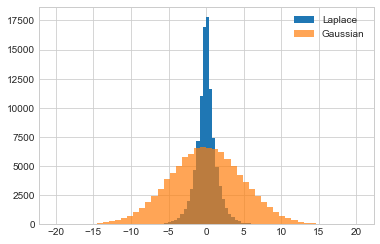

In [6]:
epsilon = 1.0
vals_laplace = [np.random.laplace(loc=0, scale=1/epsilon) for x in range(100000)]

delta = 1e-5
sigma = np.sqrt(2 * np.log(1.25 / delta)) * 1 / epsilon
vals_gauss = [np.random.normal(loc=0, scale=sigma) for x in range(100000)]

plt.hist(vals_laplace, bins=50, label='Laplace')
plt.hist(vals_gauss, bins=50, alpha=.7, label='Gaussian');
plt.legend();

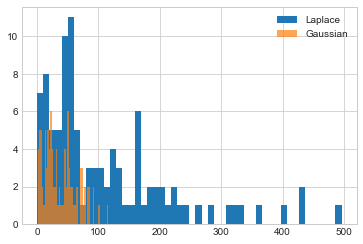

In [7]:
plt.hist(errors_lap, bins=50, label='Laplace')
plt.hist(errors_gau, bins=50, alpha=.7, label='Gaussian');
plt.legend();